# Census API - New York

In [1]:
# import packages

from us import states
import pandas as pd
import requests

# import doc with API key

import config

from scripts import censusAPI as cen

In [2]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', None)

In [62]:
cen.filterByTableName('B25002')

,name,label,concept
20076,B25002_001E,Estimate!!Total:,OCCUPANCY STATUS
20077,B25002_002E,Estimate!!Total:!!Occupied,OCCUPANCY STATUS
20078,B25002_003E,Estimate!!Total:!!Vacant,OCCUPANCY STATUS


## NY School Districts will Serve as the Geography Type

#### This is the location data we will use for the Census API call

In [4]:
# Test with Nassau County School Districts

selectedNYCounties = cen.schoolDistrictCSV((r'Data\USCensusNYSchDist.csv'))

In [5]:
natlSchDist = ("https://www2.census.gov/geo/docs/reference/codes/files/st01_al_schdist.txt")
US = cen.schoolDistrictGEOID(natlSchDist)

In [31]:
# Test with Nassau County School Districts

NYURL = ("https://www2.census.gov/geo/docs/reference/codes/files/st36_ny_schdist.txt")
NY = cen.schoolDistrictGEOID(NYURL)
NY.head(1)

,State,ID,GEOID,School District Name,Class
0,NY,36,1,Dolgeville Central School District,Unified


In [7]:
# Test merging user input school district CSV with census GEOID list

NYCountiesGEOID = cen.mergedSchoolDist(NY, selectedNYCounties)
NYCountiesGEOID.head()

,State,ID,GEOID,School District Name,Class
0,NY,36,4740,Bethpage Union Free School District,Unified
1,NY,36,10050,East Williston Union Free School District,Unified
2,NY,36,11760,Garden City Union Free School District,Unified
3,NY,36,14280,Herricks Union Free School District,Unified
4,NY,36,15810,Jericho Union Free School District,Unified


In [32]:
# Test grab GEOIDs only

NYGEOID = (cen.GEOIDonly(NYCountiesGEOID))

## US Census Data

In [68]:
# Population by Age, Gender, and Demographic

pop = 4,5,20,36,51,67,82,98,113,129,144,160,175,191,206,222,237,253,268

# Population by Race

popByRace = 363,364,365,366,367,368,369,370,371,372

# Household Type (Rent v Own)

houseType = 20151,20152,20153

# Household Size by Owner Occupied

householdSize = 20171,20172,20173

# Year Structure Built

houseYearBuilt = 20561,20562,20563,20564,20565,20566,20567,20568,20569,20570,20571

# Median Value by Year Built

houseMedValue = 21475,21476,21477,21478,21479,21480,21481,21482,21483,21484,21485

# Bachelor or Higher

edu = 2959

# Median Income

medIn= 11264,11265

# Occupancy

occ=20076,20077,20078

# Combined

population =(pop+popByRace)

economcy = (medIn)

housing = (occ+houseType+householdSize+houseMedValue+houseYearBuilt)

In [85]:
NV = cen.dataFrame("testname",(popByRace),('00060'),32)
NV['B02001_001E']

0    B02001_001E     
1    Estimate!!Total:
2    RACE            
0    2182004         
Name: B02001_001E, dtype: object

In [181]:
NY = cen.dataFrame("testname",(popByRace),(NYGEOID),36)
NY
#NY.head()
#NY.columns = pd.MultiIndex.from_arrays([NY.rows[1:3]])
#NY

,NAME,school district (unified),state,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E
0,NaN,NaN,NaN,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E
1,NaN,NaN,NaN,Estimate!!Total:,Estimate!!Total:!!White alone,Estimate!!Total:!!Black or African American alone,Estimate!!Total:!!American Indian and Alaska Native alone,Estimate!!Total:!!Asian alone,Estimate!!Total:!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total:!!Some other race alone,Estimate!!Total:!!Two or more races:,Estimate!!Total:!!Two or more races:!!Two races including Some other race,"Estimate!!Total:!!Two or more races:!!Two races excluding Some other race, and three or more races"
2,NaN,NaN,NaN,RACE,RACE,RACE,RACE,RACE,RACE,RACE,RACE,RACE,RACE
0,"Roslyn Union Free School District, New York",25050,36,18598,14397,506,13,2924,0,582,176,19,157
1,"East Williston Union Free School District, New York",10050,36,8886,6553,239,15,1769,0,121,189,56,133
2,"North Shore Central School District, New York",26370,36,16648,14473,320,0,1020,0,633,202,15,187
3,"Garden City Union Free School District, New York",11760,36,22499,20099,410,0,1109,0,465,416,52,364
4,"Wantagh Union Free School District, New York",29850,36,16739,16086,88,0,204,0,102,259,28,231
5,"Manhasset Union Free School District, New York",18270,36,16847,12842,571,6,2868,0,215,345,27,318
6,"Port Washington Union Free School District, New York",23580,36,31028,24451,540,44,3567,6,1912,508,53,455


In [187]:
#NY.columns = pd.MultiIndex.from_arrays([NY.head()])
#NY

,"((NAME,),)","((school district (unified),),)","((state,),)","((B02001_001E,),)","((B02001_002E,),)","((B02001_003E,),)","((B02001_004E,),)","((B02001_005E,),)","((B02001_006E,),)","((B02001_007E,),)","((B02001_008E,),)","((B02001_009E,),)","((B02001_010E,),)"
0,NaN,NaN,NaN,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E
1,NaN,NaN,NaN,Estimate!!Total:,Estimate!!Total:!!White alone,Estimate!!Total:!!Black or African American alone,Estimate!!Total:!!American Indian and Alaska Native alone,Estimate!!Total:!!Asian alone,Estimate!!Total:!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total:!!Some other race alone,Estimate!!Total:!!Two or more races:,Estimate!!Total:!!Two or more races:!!Two races including Some other race,"Estimate!!Total:!!Two or more races:!!Two races excluding Some other race, and three or more races"
2,NaN,NaN,NaN,RACE,RACE,RACE,RACE,RACE,RACE,RACE,RACE,RACE,RACE
0,"Roslyn Union Free School District, New York",25050,36,18598,14397,506,13,2924,0,582,176,19,157
1,"East Williston Union Free School District, New York",10050,36,8886,6553,239,15,1769,0,121,189,56,133
2,"North Shore Central School District, New York",26370,36,16648,14473,320,0,1020,0,633,202,15,187
3,"Garden City Union Free School District, New York",11760,36,22499,20099,410,0,1109,0,465,416,52,364
4,"Wantagh Union Free School District, New York",29850,36,16739,16086,88,0,204,0,102,259,28,231
5,"Manhasset Union Free School District, New York",18270,36,16847,12842,571,6,2868,0,215,345,27,318
6,"Port Washington Union Free School District, New York",23580,36,31028,24451,540,44,3567,6,1912,508,53,455


## Filtering DataFrames!

In [ ]:
# Filter by integer value
# newDf = popDF.loc[(popDF['B01001A_001E']>40000)]
# newDf

## Matplot

In [86]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

In [172]:
allDistricts = NY["NAME"].tolist()
totalPop = NY['B02001_001E'].tolist()

allDistrictsNew = (allDistricts[3:])
totalPopNew = (totalPop[3:])
print(totalPopNew)

['18598', '8886', '16648', '22499', '16739', '16847', '31028', '22069', '20077', '45666', '15845', '17255', '28549', '24203', '34726', '17942', '46968']


<ipython-input-142-d3d672088453>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=plt.subplot(1,1,1)


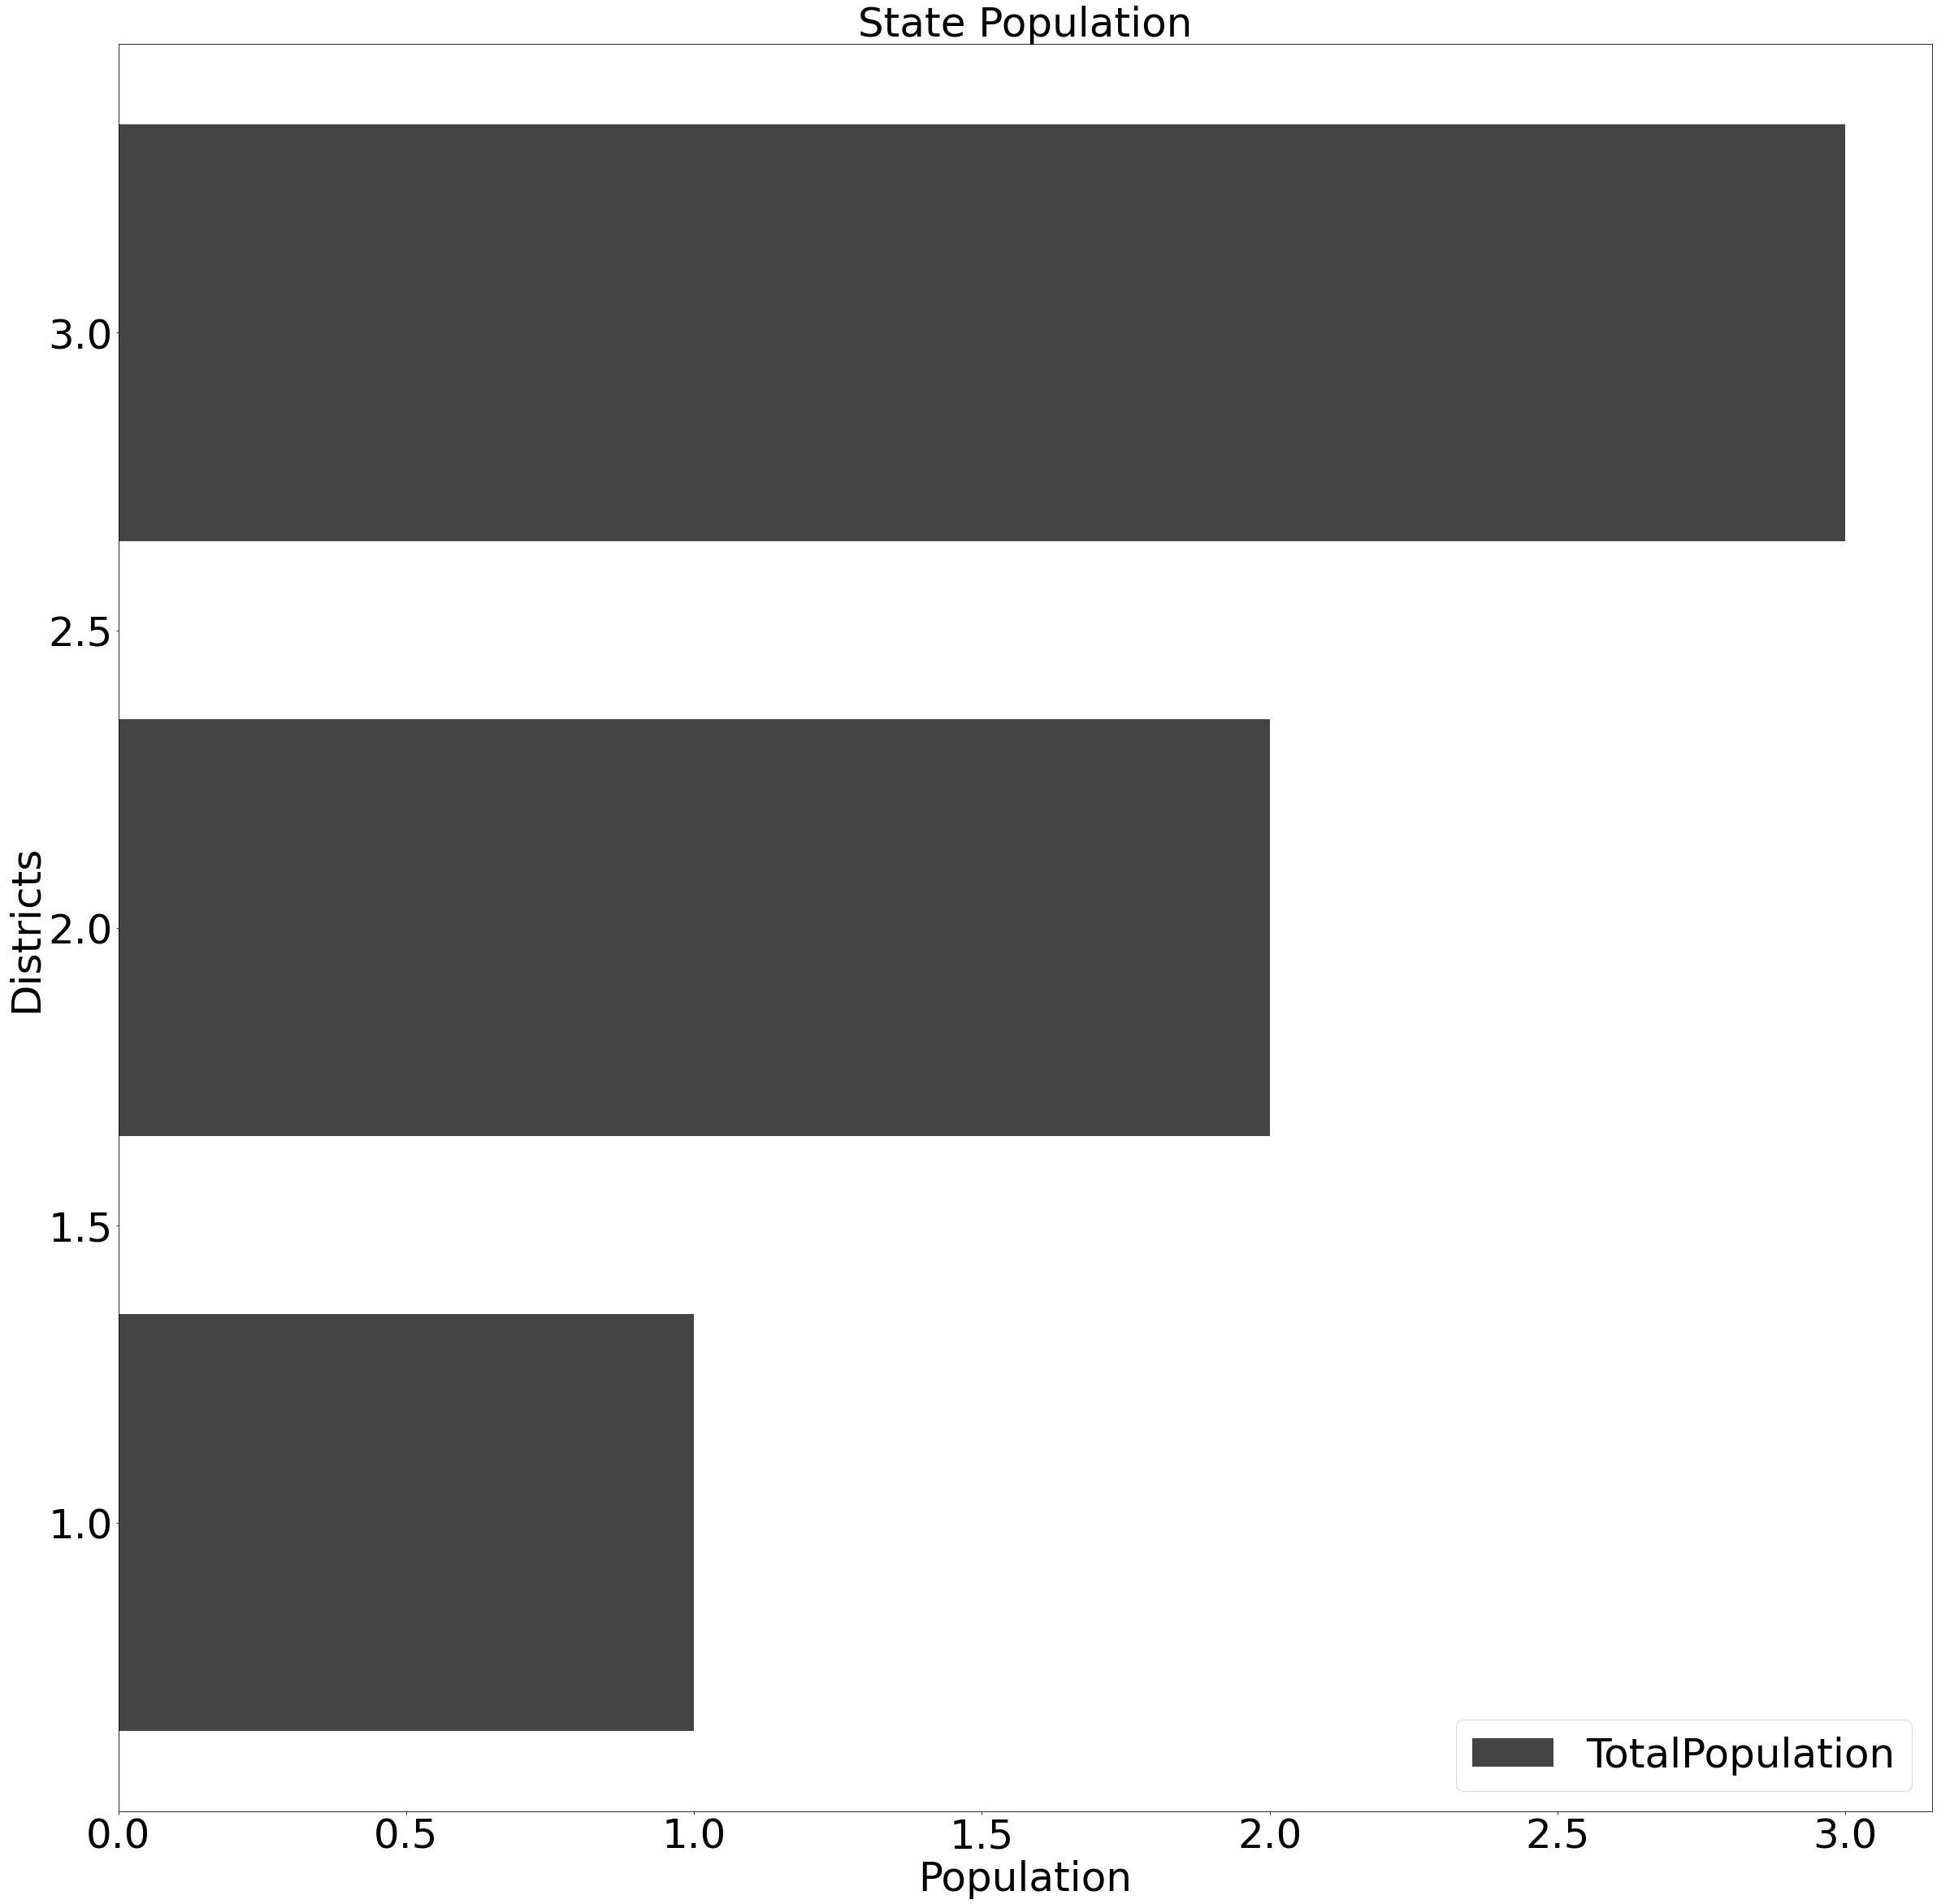

In [142]:
fig = plt.figure(figsize=(40,40))

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)


plt.title('State Population',fontsize=50)
plt.ylabel('Districts',fontsize=50)
plt.xlabel('Population',fontsize=50)
ax1=plt.subplot(1,1,1)

ax1.barh([1,2,3], [1,2,3], 0.7, color = "#444444",label="TotalPopulation")
#plt.xticks([0,10])

plt.legend(fontsize=50)
plt.show()